# LINEAR REGRESSION MODEL 

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to show seaborn graphics on Jupyter Notebook
%matplotlib inline 

## 2. Import Data Set

Data Souce: https://www.kaggle.com/camnugent/california-housing-prices?select=housing.csv

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [10]:
df = pd.read_csv('housing.csv')

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


I will take a look at my data set and check if there is any missing data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
df.isnull().sum() # I found 207 NULL value on total_bedrooms column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

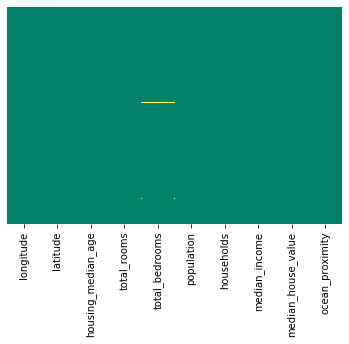

In [27]:
sns.heatmap(df.isnull(), yticklabels = False,
               cbar = False,
               cmap = 'summer')

In [20]:
df['total_bedrooms'].isnull().sum() / df['total_bedrooms'].count() # Only 1% of total_bedrooms data is missing 

0.010130670973425342

Since only 1% of the data is missing I am going to replace null values with mean. 

In [32]:
df['total_bedrooms'].mean()

537.8705525375639

In [28]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [31]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 3. Data Visualization 

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


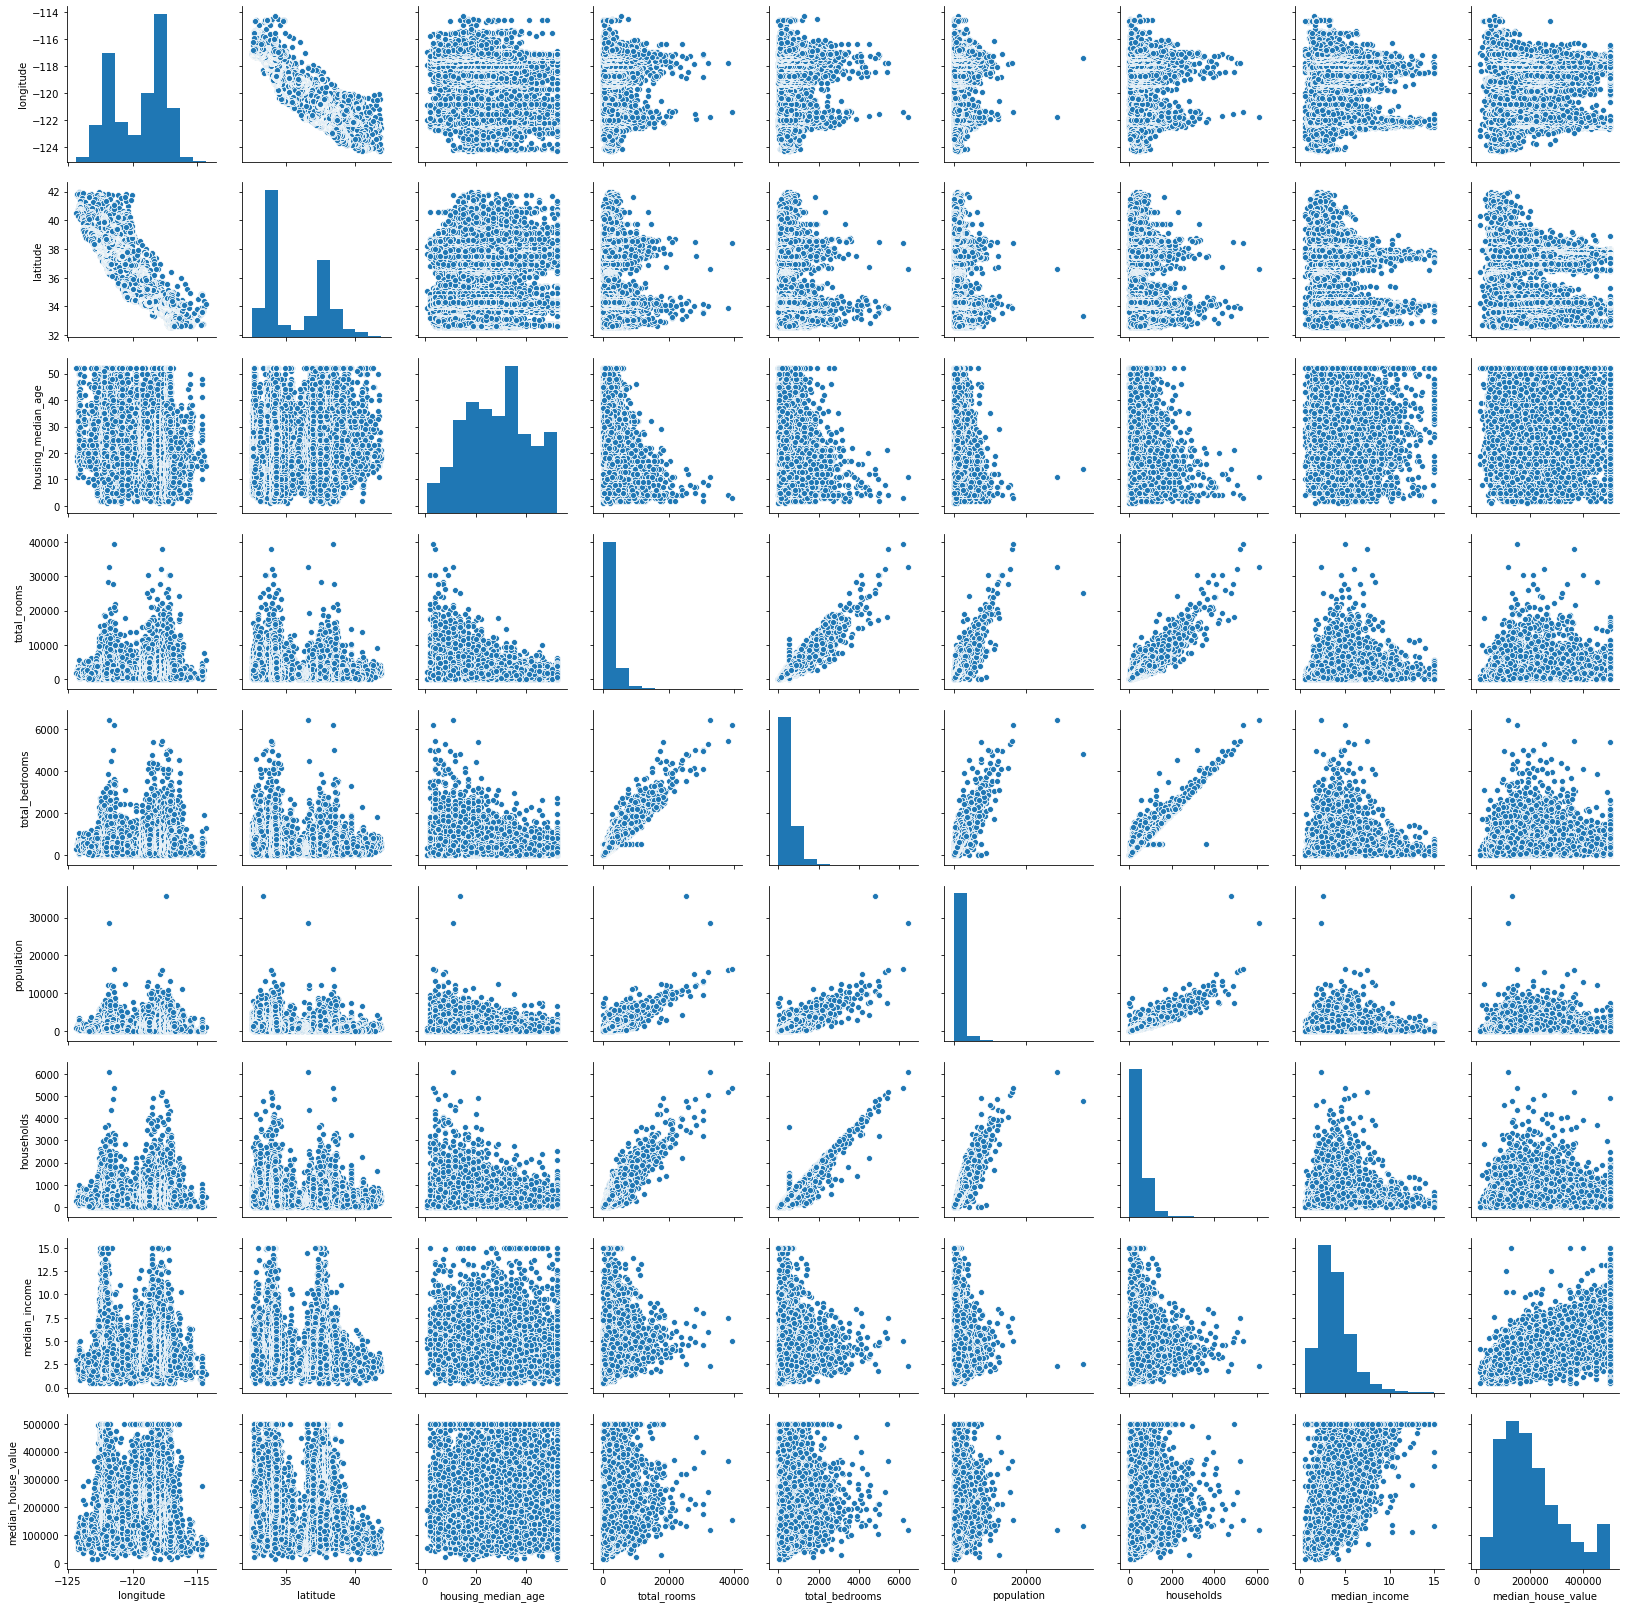

In [34]:
sns.pairplot(df)

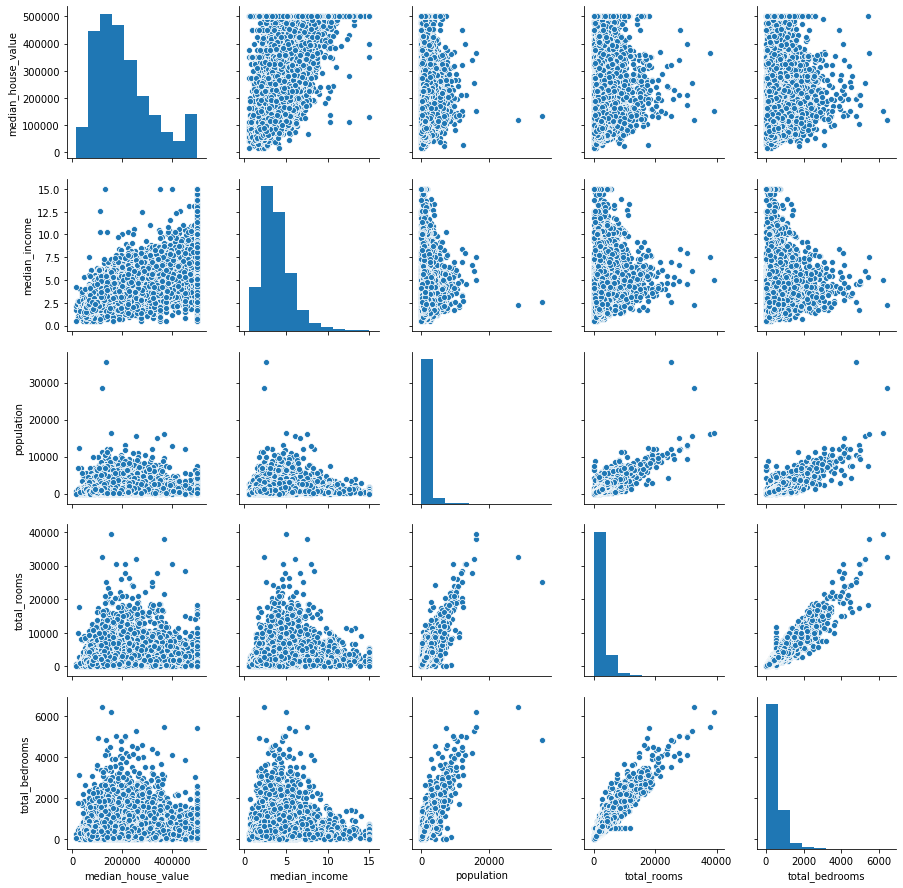

In [43]:
sns.pairplot(df[['median_house_value', 'median_income','population','total_rooms','total_bedrooms']]) 
# take a closer look

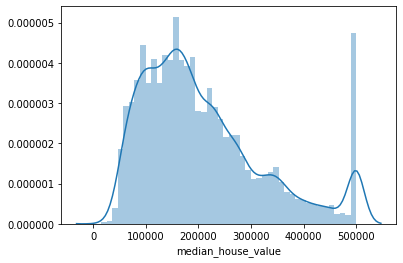

In [35]:
sns.distplot(df['median_house_value'])

In [36]:
# Right skewed regression: Mode > Median > Mean

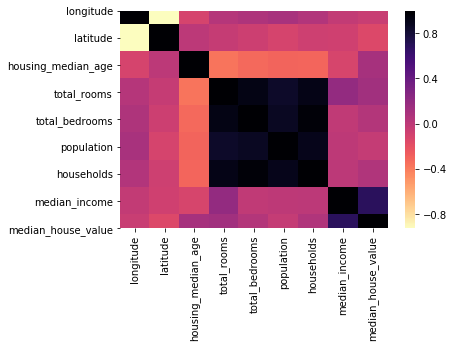

In [39]:
sns.heatmap(df.corr(), cmap = 'magma_r')

## 4. Create Arrays 

In [45]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [46]:
y = df['median_house_value'] # y value is the target value that we want to predict

In [65]:
cols = ['median_house_value', 'ocean_proximity'] # I want to drop 'ocean_proximity' because it's not a float value

In [67]:
X = df.drop(cols, axis =1) # X contains independent values to calculate y value

## 5. Train_Test_Split

In [68]:
from sklearn.model_selection import train_test_split

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. Create and Train A Model 

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression() # I create a Linear Regression model object

### I will fit my train sets into model.  
fit_intercept : boolean, optional, default True whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

In [72]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 7. Model Evaluation 

At that point, I will evaluate my model checking its coefficients.

In [73]:
print(lm.intercept_) # That shows the expected mean value of y when all x = 0

-3583900.464809007


In [74]:
print(lm.coef_)

[-4.26430157e+04 -4.23108503e+04  1.18516310e+03 -8.05495391e+00
  1.19513915e+02 -3.75647763e+01  3.97022468e+01  4.03610310e+04]


In [75]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns= ['Coefficient'])

In [76]:
coef_df

,Coefficient
longitude,-42643.015704
latitude,-42310.850271
housing_median_age,1185.163097
total_rooms,-8.054954
total_bedrooms,119.513915
population,-37.564776
households,39.702247
median_income,40361.031011


According to the table above, holding all other features fixed and in case of an unit increase in y columns, these coefficient values are presenting the amount of increase of X ('median_house_value').

## Prediction

In [77]:
predictions = lm.predict(X_test) # Linear Regression module includes predict() function as well. 
# I will predict y_test using X_test. 

In [78]:
# I grab predictions off the test set here, to see if it's working well

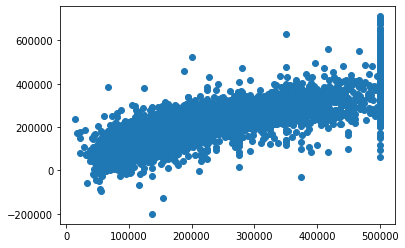

In [79]:
plt.scatter(y_test, predictions)

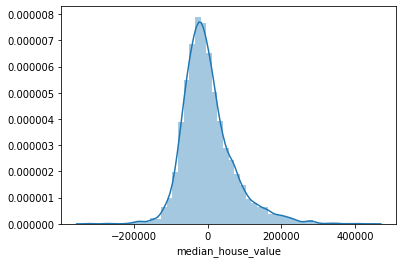

In [82]:
# I want to calculate my model's error rate which is y_test - predictions
# I want to make sure it's normally distruted.
sns.distplot((y_test - predictions), bins = 50)

In [84]:
# Normally distributed residuals mean that your model is correct choise for your data, which looks great for my data.

## 9. Regression Evalution Metrics 

In [88]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
mean_absolute_error = metrics.mean_absolute_error(y_test, predictions)
# MAE is the average of the absolute value of errors.

mean_squared_error = metrics.mean_squared_error(y_test, predictions)
# MSE is the mean of squared errors, more useful than MAE, because it punishes larger errors.

root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_test, predictions))
# RMSE is the square root of the mean of the squared error, more useful than MSE, because it's interpretable in the 'y' unit

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 51066.101330093596
MSE: 4852059947.129127
RMSE: 69656.72937433343


In [192]:
lm.predict(X_test)

array([ 65027.79666328, 175460.70054673, 302490.77153556, ...,
       277807.1179576 , 120908.04249602, 213128.71813807])